In [2]:
import numpy as np
from HestonFunctions_copy import Heston_explicit_bf, HestonCallClosedForm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
kappa=2
eta=0.2
sigma=0.3
rho=0.8
V0=1
r=0.03
T=1
dt=1/7000
S0=200
I=40
J=20
K=100

In [47]:
# Semi-analytical solution
semi_analytical_price = HestonCallClosedForm(kappa, eta, sigma, rho, V0, r, T, S0, K)

# I values to test for convergence in S-direction
I_values = [10, 20, 30, 40, 50, 60]  # Example values
errors_i = []

for I in I_values:
    U, _ = Heston_explicit_bf(kappa, eta, sigma, rho, V0, r, T, dt, S0, I, J, K)
    # fd_price = U[1, 1]  # Assuming this is the correct way to extract the option price
    # error = abs(fd_price - semi_analytical_price)
    error = np.max(np.abs(U - semi_analytical_price))

    # Calculate the L_inf norm of matrix U (assuming U is the matrix A)
    U_norm = np.max(np.sum(np.abs(U), axis=1))

    # Calculate the relative error
    relative_error = error / U_norm
    errors_i.append(relative_error)
    print("\n", I, "done--")


100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps 

In [48]:
print(errors_i)

[0.012757089890268632, 0.01274457071032429, 0.01274246116980215, 0.012741747430915462, 0.012741422906131214, 0.012741248561123165]


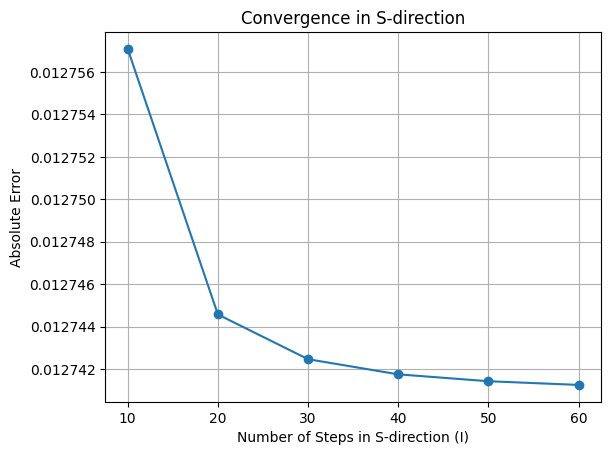

In [49]:
# Plotting
plt.plot(I_values, errors_i, marker='o')
plt.xlabel('Number of Steps in S-direction (I)')
plt.ylabel('Absolute Error')
plt.title('Convergence in S-direction')
plt.grid(True)
plt.show()

In [50]:
coeff = np.polyfit(I_values, errors_i, deg=2)

In [51]:
I_values = np.array(I_values)

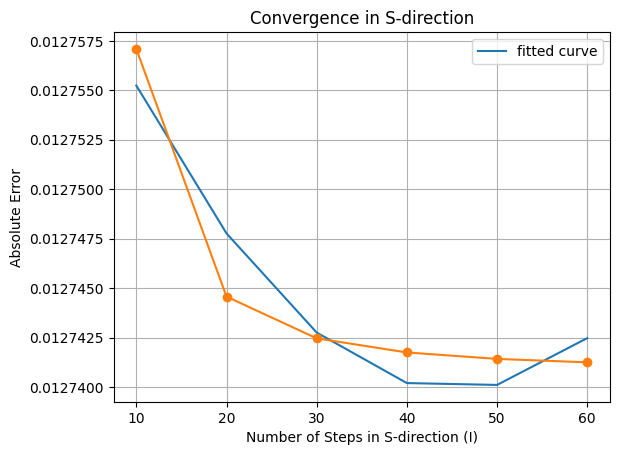

In [55]:
plt.plot(I_values, coeff[0]*(I_values)**2 + coeff[1]*I_values + coeff[2], label='fitted curve')
plt.plot(I_values, errors_i, marker='o')
plt.xlabel('Number of Steps in S-direction (I)')
plt.ylabel('Absolute Error')
plt.title('Convergence in S-direction')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [53]:
# Convert J_values and errors_j to logarithmic scale
log_I_values = np.log(I_values)
log_errors_i = np.log(errors_i)

# Calculate the slope using the first and last points
slope_i = (log_errors_i[-1] - log_errors_i[0]) / (log_I_values[-1] - log_I_values[0])
slope_i

-0.0006934738347073383

dv

In [23]:
kappa=2
eta=0.2
sigma=0.3
rho=0.8
V0=1
r=0.03
T=1
dt=1/7000
S0=200
I=40
J=20
K=100

In [24]:
# Semi-analytical solution
semi_analytical_price = HestonCallClosedForm(kappa, eta, sigma, rho, V0, r, T, S0, K)

# I values to test for convergence in S-direction
J_values = [10, 20, 30, 40, 50, 60, 70, 80]  # Example values
errors_j = []

for J in J_values:
    U, _ = Heston_explicit_bf(kappa, eta, sigma, rho, V0, r, T, dt, S0, I, J, K)
    error = np.max(np.abs(U - semi_analytical_price))

    # Calculate the L_inf norm of matrix U (assuming U is the matrix A)
    U_norm = np.max(np.sum(np.abs(U), axis=1))

    # Calculate the relative error
    relative_error = error / U_norm
    errors_j.append(relative_error)
    print("\n", J, "done--")

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps 

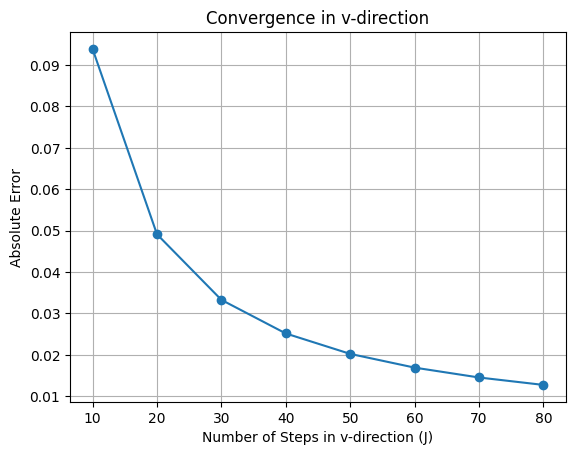

In [25]:
# Plotting
plt.plot(J_values, errors_j, marker='o')
plt.xlabel('Number of Steps in v-direction (J)')
plt.ylabel('Absolute Error')
plt.title('Convergence in v-direction')
plt.grid(True)
plt.show()

In [57]:
coeff = np.polyfit(J_values, errors_j, deg=2)
J_values = np.array(J_values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


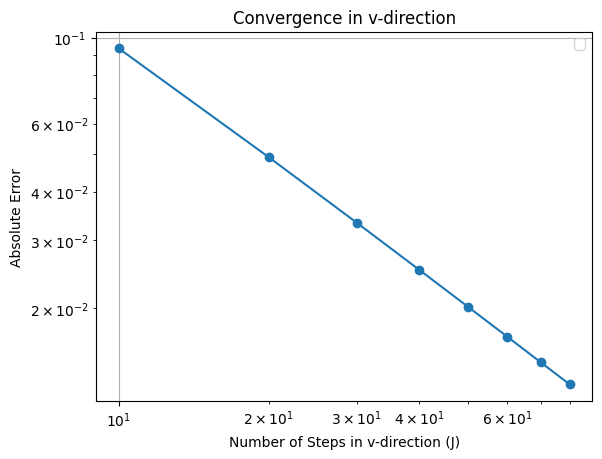

In [59]:
# plt.plot(J_values, coeff[0]*(J_values)**2 + coeff[1]*J_values + coeff[2], label='fitted curve')
plt.plot(J_values, errors_j, marker='o')
plt.xlabel('Number of Steps in v-direction (J)')
plt.ylabel('Absolute Error')
plt.title('Convergence in v-direction')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
# Convert J_values and errors_j to logarithmic scale
log_J_values = np.log(J_values)
log_errors_j = np.log(errors_j)

# Calculate the slope using the first and last points
slope_j = (log_errors_j[-1] - log_errors_j[0]) / (log_J_values[-1] - log_J_values[0])
slope_j

-0.9605426517408612

dt

In [3]:
kappa=2
eta=0.2
sigma=0.3
rho=0.8
V0=1
r=0.03
T=1
dt=1/7000
S0=200
I=40
J=20
K=100

In [4]:
# Semi-analytical solution
semi_analytical_price = HestonCallClosedForm(kappa, eta, sigma, rho, V0, r, T, S0, K)

# dt values to test for convergence in t-direction
dt_values = [1/3000, 1/4000, 1/6000, 1/20000, 1/25000]  # Example values
errors_dt = []

for dt in dt_values:
    U, _ = Heston_explicit_bf(kappa, eta, sigma, rho, V0, r, T, dt, S0, I, J, K)
    error = np.max(np.abs(U - semi_analytical_price))

    # Calculate the L_inf norm of matrix U (assuming U is the matrix A)
    U_norm = np.max(np.sum(np.abs(U), axis=1))

    # Calculate the relative error
    relative_error = error / U_norm
    errors_dt.append(relative_error)
    print("\n", dt, "done--")

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   
 0.0003333333333333333 done--
100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee

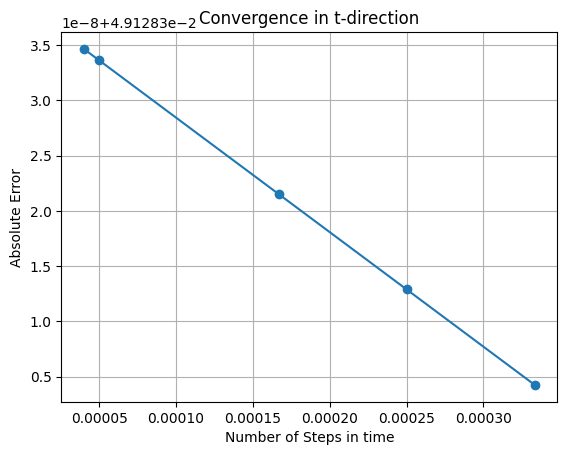

In [5]:
# Plotting
plt.plot(dt_values, errors_dt, marker='o')
plt.xlabel('Number of Steps in time')
plt.ylabel('Absolute Error')
plt.title('Convergence in t-direction')
plt.grid(True)
plt.show()

In [60]:
coeff = np.polyfit(dt_values, errors_dt, deg=1)
dt_values = np.array(dt_values)

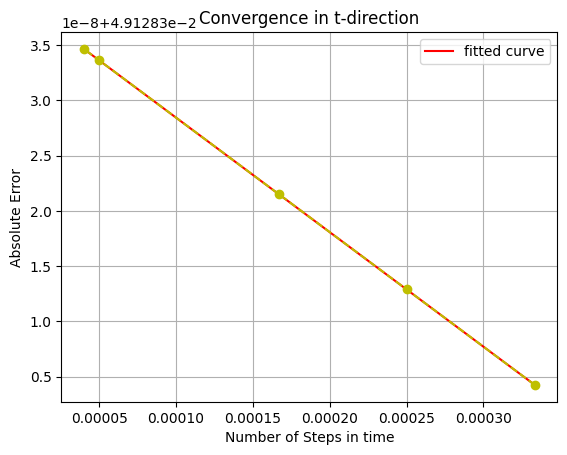

In [65]:
plt.plot(dt_values, coeff[0]*(dt_values) + coeff[1], label='fitted curve', color='r') #*dt_values + coeff[2]
plt.plot(dt_values, errors_dt, marker='o', linestyle='dashed', color = 'y')
plt.xlabel('Number of Steps in time')
plt.ylabel('Absolute Error')
plt.title('Convergence in t-direction')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
# Convert J_values and errors_j to logarithmic scale
log_dt_values = np.log(dt_values)
log_errors_dt = np.log(errors_dt)

# Calculate the slope using the first and last points
slope_dt = (log_errors_dt[-1] - log_errors_dt[0]) / (log_dt_values[-1] - log_dt_values[0])
slope_dt

-2.917337522952182e-07